11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2846 - accuracy: 0.9186 - val_loss: 0.1535 - val_accuracy: 0.9578
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1285 - accuracy: 0.9618 - val_loss: 0.1119 - val_accuracy: 0.9686
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0891 - accuracy: 0.9739 - val_loss: 0.1037 - val_accuracy: 0.9668
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.0933 - val_accuracy: 0.9726
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0510 - accuracy: 0.9848 - val_loss: 0.0869 - val_accuracy: 0.9737


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9764
Test accuracy: 0.9764000177383423


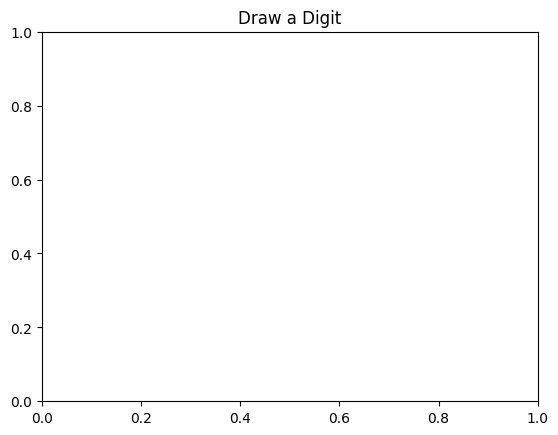

1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 64ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image, ImageDraw

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('mnist_model.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Function to draw and recognize digits
class DrawingApp:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ax.set_title('Draw a Digit')
        self.image = Image.new('L', (200, 200), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.last_x, self.last_y = None, None

        self.canvas = self.fig.canvas
        self.canvas.mpl_connect('button_press_event', self.on_mouse_down)
        self.canvas.mpl_connect('button_release_event', self.on_mouse_up)
        self.canvas.mpl_connect('motion_notify_event', self.on_mouse_move)

        self.recognize_button = widgets.Button(description='Recognize')
        self.recognize_button.on_click(self.recognize_digit)

        self.clear_button = widgets.Button(description='Clear')
        self.clear_button.on_click(self.clear_canvas)

        self.output = widgets.Output()
        display(widgets.VBox([self.recognize_button, self.clear_button, self.output]))
        display(self.canvas)

    def on_mouse_down(self, event):
        self.last_x, self.last_y = event.xdata, event.ydata

    def on_mouse_up(self, event):
        self.last_x, self.last_y = None, None

    def on_mouse_move(self, event):
        if self.last_x is not None and event.xdata is not None and event.ydata is not None:
            x1, y1 = self.last_x, self.last_y
            x2, y2 = event.xdata, event.ydata
            self.draw.line([x1, y1, x2, y2], fill='black', width=5)
            self.last_x, self.last_y = x2, y2
            self.update_canvas()

    def update_canvas(self):
        self.ax.clear()
        self.ax.imshow(self.image, cmap='gray')
        self.ax.set_title('Draw a Digit')
        self.canvas.draw()

    def clear_canvas(self, event):
        self.image = Image.new('L', (200, 200), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.update_canvas()

    def recognize_digit(self, event):
        resized_image = self.image.resize((28, 28))
        image_array = np.array(resized_image)
        image_array = 255 - image_array
        image_array = image_array / 255.0
        image_array = image_array.reshape(1, 28, 28)

        model = tf.keras.models.load_model('mnist_model.h5')
        prediction = model.predict(image_array)
        predicted_digit = np.argmax(prediction)

        with self.output:
            clear_output()
            print(f"Predicted Digit: {predicted_digit}")

if __name__ == "__main__":
    app = DrawingApp()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('mnist_model.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Function to upload and recognize digits
class UploadApp:
    def __init__(self):
        self.upload_button = widgets.FileUpload(accept='.png, .jpg, .jpeg', multiple=False)
        self.upload_button.observe(self.on_upload, names='value')

        self.recognize_button = widgets.Button(description='Recognize')
        self.recognize_button.on_click(self.recognize_digit)

        self.clear_button = widgets.Button(description='Clear')
        self.clear_button.on_click(self.clear_output)

        self.output = widgets.Output()

        display(widgets.VBox([self.upload_button, self.recognize_button, self.clear_button, self.output]))

    def on_upload(self, change):
        self.image_file = self.upload_button.value
        for name, file_info in self.image_file.items():
            self.image = Image.open(file_info['metadata']['name']).convert('L')
            with self.output:
                clear_output()
                display(self.image)

    def recognize_digit(self, event):
        if self.image:
            resized_image = self.image.resize((28, 28))
            image_array = np.array(resized_image)
            image_array = 255 - image_array
            image_array = image_array / 255.0
            image_array = image_array.reshape(1, 28, 28)

            model = tf.keras.models.load_model('mnist_model.h5')
            prediction = model.predict(image_array)
            predicted_digit = np.argmax(prediction)

            with self.output:
                print(f"Predicted Digit: {predicted_digit}")

    def clear_output(self, event):
        with self.output:
            clear_output()
        self.upload_button.value.clear()
        self.image = None

if __name__ == "__main__":
    app = UploadApp()


Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2857 - accuracy: 0.9187 - val_loss: 0.1634 - val_accuracy: 0.9512
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1265 - accuracy: 0.9629 - val_loss: 0.1183 - val_accuracy: 0.9643
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9743 - val_loss: 0.0970 - val_accuracy: 0.9712
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0632 - accuracy: 0.9814 - val_loss: 0.1012 - val_accuracy: 0.9710
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9746
Test accuracy: 0.9746000170707703


FileNotFoundError: [Errno 2] No such file or directory: 'istockphoto-154932750-612x612.jpg'

AttributeError: 'UploadApp' object has no attribute 'image'

1/1 [==============================] - 0s 54ms/step


# **image segementation**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('Water Bodies Dataset'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

In [ ]:
import tensorflow as tf
import cv2
import os
import sys
import random
import numpy as np
import glob

from tqdm import tqdm
import tifffile as tif
from PIL import Image
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.models import Model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def prep_image(image, crop_size, size_y, size_x):
    # Resize the image
    prepd_image = cv2.resize(image,(size_y, size_x))
    # Crop the image to remove the border black pixels
    prepd_image = prepd_image[crop_size:-crop_size, crop_size:-crop_size]
    return prepd_image

In [ ]:
size_x=148
size_y=148
crop_size=10
################ Storing Train Images into an array #############
train_images=[]

for directory_path in glob.glob("Water Bodies Dataset/Images"):
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        #print(img_path)
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        image=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=prep_image(img,crop_size,size_y,size_x)
        train_images.append(img)

train_images = np.array(train_images) #converting list to array

In [ ]:
rain_masks = []

for directory_path in glob.glob("Water Bodies Dataset/Masks"):
    for mask_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        mask=cv2.imread(mask_path,0)
        mask=prep_image(mask,crop_size,size_y,size_x)
        train_masks.append(mask)

train_masks = np.array(train_masks) #converting list to array

In [ ]:
len(train_images), len(train_masks)

NameError: name 'train_masks' is not defined

# **img to txt**

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import pytesseract
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
from google.colab import files
uploaded=files.upload()
#load the uploaded image
for fn in uploaded.keys():
  img_path=fn

Saving SL-RomanticMessages--4_butterflies-3ae0a1e2abcc45de8301651c7c23af8b.jpg to SL-RomanticMessages--4_butterflies-3ae0a1e2abcc45de8301651c7c23af8b.jpg


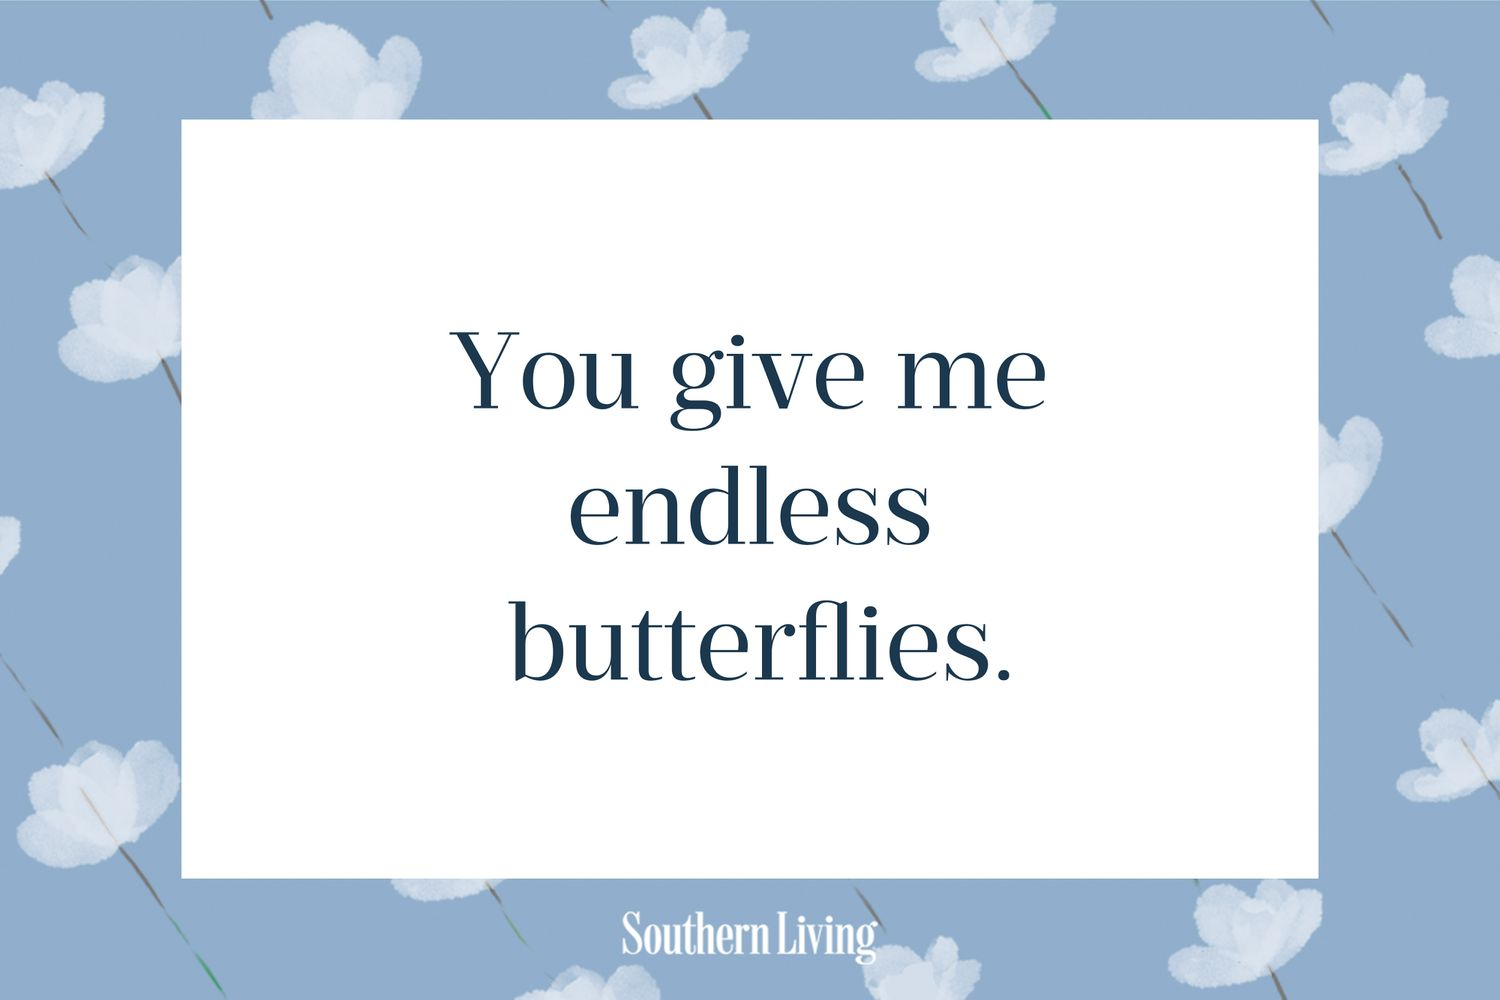

In [ ]:
#read the image using opencv
img=cv2.imread(img_path)
#diplay the image
cv2_imshow(img)

In [ ]:
#convert the image to gray scale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#use tesseract to do OCR in image
text=pytesseract.image_to_string(gray)
#print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
You give me

endless
butterflies.

 



In [ ]:
from google.colab import files
uploaded=files.upload()
#load the uploaded image
for fn in uploaded.keys():
  img_path=fn

Saving b9afd24d812a6d61769845416f139efcd6042914.jpeg to b9afd24d812a6d61769845416f139efcd6042914.jpeg


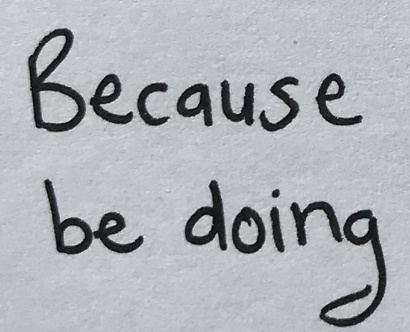

In [ ]:
#read the image using opencv
img=cv2.imread(img_path)
#diplay the image
cv2_imshow(img)

In [ ]:
#convert the image to gray scale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#use tesseract to do OCR in image
text=pytesseract.image_to_string(gray)
#print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
Gecaus @
be es

